<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Unit-2-Sprint-4-Model-Validation/blob/master/DS_Unit_2_Sprint_Challenge_4_Model_Validation_Stretch_Goals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Data Science Unit 2 Sprint Challenge 4 — Model Validation

Follow the instructions for each numbered part to earn a score of 2. See the bottom of the notebook for a list of ways you can earn a score of 3.

## Predicting Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive.

The goal is to predict the last column, whether the donor made a donation in March 2007, using information about each donor's history. We'll measure success using recall score as the model evaluation metric.

Good data-driven systems for tracking and predicting donations and supply needs can improve the entire supply chain, making sure that more patients get the blood transfusions they need.

#### Run this cell to load the data:

In [0]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')

df = df.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'total_volume_donated', 
    'Time (months)': 'months_since_first_donation', 
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})

## Part 1.1 — Begin with baselines

What **accuracy score** would you get here with a **"majority class baseline"?** 
 
(You don't need to split the data into train and test sets yet. You can answer this question either with a scikit-learn function or with a pandas function.)

In [2]:
df.isnull().sum()

months_since_last_donation     0
number_of_donations            0
total_volume_donated           0
months_since_first_donation    0
made_donation_in_march_2007    0
dtype: int64

In [3]:
df.columns

Index(['months_since_last_donation', 'number_of_donations',
       'total_volume_donated', 'months_since_first_donation',
       'made_donation_in_march_2007'],
      dtype='object')

In [4]:
df.head()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
# Using simple pandas value counts method
df.made_donation_in_march_2007.value_counts(normalize=True)

0    0.762032
1    0.237968
Name: made_donation_in_march_2007, dtype: float64

In [0]:
# Using sklearn accuracy_score
import numpy as np

majority_class = df.made_donation_in_march_2007.mode()[0]
prediction = np.full(shape=df.made_donation_in_march_2007.shape, 
                     fill_value=majority_class)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(df.made_donation_in_march_2007, prediction)

0.7620320855614974

Baseline Accuracy Score is 76%.

What **recall score** would you get here with a **majority class baseline?**

(You can answer this question either with a scikit-learn function or with no code, just your understanding of recall.)

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df.made_donation_in_march_2007, prediction)

array([[570,   0],
       [178,   0]])

Recall score is Recall = TP/Actual Positive

In this case it is 0. Confirming the same with sklearn.

In [9]:
from sklearn.metrics import recall_score

recall_score(df.made_donation_in_march_2007, prediction)

0.0

### Stretch Goal - Feature Engineering

In [10]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


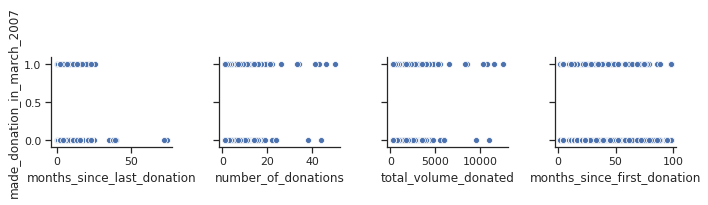

In [11]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop(['made_donation_in_march_2007'])

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['made_donation_in_march_2007'], x_vars=x_columns)

In [12]:
# Checking for correlation
df.corr()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
months_since_last_donation,1.000000,-0.182745,-0.182745,0.160618,-0.279869
number_of_donations,-0.182745,1.000000,1.000000,0.634940,0.218633
total_volume_donated,-0.182745,1.000000,1.000000,0.634940,0.218633
months_since_first_donation,0.160618,0.634940,0.634940,1.000000,-0.035854
made_donation_in_march_2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [13]:
exog = df.drop(columns=['made_donation_in_march_2007'])
endog = df.made_donation_in_march_2007

import statsmodels.api as sm
model = sm.Logit(endog, sm.add_constant(exog))
print(model.fit().summary2())

         Current function value: 0.473173
         Iterations: 35
                              Results: Logit
Model:               Logit                       No. Iterations:   35.0000 
Dependent Variable:  made_donation_in_march_2007 Pseudo R-squared: 0.138   
Date:                2019-02-01 18:54            AIC:              715.8668
No. Observations:    748                         BIC:              734.3364
Df Model:            3                           Log-Likelihood:   -353.93 
Df Residuals:        744                         LL-Null:          -410.45 
Converged:           0.0000                      Scale:            1.0000  
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
const                       -0.4495   0.1803 -2.4926 0.0127 -0.8030 -0.0961
months_since_last_donation  -0.0986   0.0173 -5.6929 

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packa

In [0]:
# Based on 1st run of GridSearchValidation 
df['months_since_last_donation^2'] = df['months_since_last_donation'] ** 2

df['months_since_last_donation_number_of_donations'] = df['months_since_last_donation']*df['number_of_donations']
df['prob'] = (df['months_since_first_donation']/df['number_of_donations'])-df['months_since_last_donation']

## Part 1.2 — Split data

In this Sprint Challenge, you will use "Cross-Validation with Independent Test Set" for your model evaluation protocol.

First, **split the data into `X_train, X_test, y_train, y_test`**, with random shuffle. (You can include 75% of the data in the train set, and hold out 25% for the test set.)


In [15]:
# Spliting the independent and dependent variables.

X = df.drop(columns=['made_donation_in_march_2007'])
y = df.made_donation_in_march_2007

X.columns

Index(['months_since_last_donation', 'number_of_donations',
       'total_volume_donated', 'months_since_first_donation',
       'months_since_last_donation^2',
       'months_since_last_donation_number_of_donations', 'prob'],
      dtype='object')

In [0]:
# Split data into train and test
from sklearn.model_selection import train_test_split

# To ensure we get the same sample for training split introduced random_state
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    shuffle=True)

## Part 2.1 — Make a pipeline

Make a **pipeline** which includes:
- Preprocessing with any scikit-learn [**Scaler**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- Feature selection with **[`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)([`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html))**
- Classification with [**`LogisticRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [0]:
# Imports for pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

In [0]:
# Create pipeline
pipeline = make_pipeline(\
                         RobustScaler(),
                         SelectKBest(f_classif),
                         LogisticRegression(solver='lbfgs'))

## Part 2.2 — Do Grid Search Cross-Validation

Do [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with your pipeline. Use **5 folds** and **recall score**.

Include these **parameters for your grid:**

#### `SelectKBest`
- `k : 1, 2, 3, 4`

#### `LogisticRegression`
- `class_weight : None, 'balanced'`
- `C : .0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0`


**Fit** on the appropriate data.

In [19]:
from sklearn.model_selection import GridSearchCV

# Added polynomial feature param transformation as stretch goal
param_grid = {
    'selectkbest__k': range(1, len(X_train.columns)+1),
    'logisticregression__class_weight': [None,'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='recall', verbose=1)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    7.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x7f9a291e80d0>)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_int...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'selectkbest__k': range(1, 8), 'logisticregression__class_weight': [None, 'balanced'], 'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

## Part 3 — Show best score and parameters

Display your **best cross-validation score**, and the **best parameters** (the values of `k, class_weight, C`) from the grid search.

(You're not evaluated here on how good your score is, or which parameters you find. You're only evaluated on being able to display the information. There are several ways you can get the information, and any way is acceptable.)

In [20]:
print('Cross Validation Score:', gridsearch.best_score_)

print('Best Parameters:', gridsearch.best_params_)

Cross Validation Score: 0.784519402166461
Best Parameters: {'logisticregression__C': 0.0001, 'logisticregression__class_weight': 'balanced', 'selectkbest__k': 1}


Cross Validation Score  without feature engineering - 78.45%

Features selected:
months_since_last_donation

Features not selected:
number_of_donations
total_volume_donated
months_since_first_donation

In [21]:
# Which features were selected?
selector = gridsearch.best_estimator_.named_steps['selectkbest']
all_names = X_train.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)

print()
print('Features not selected:')
for name in unselected_names:
    print(name)


Features selected:
months_since_last_donation

Features not selected:
number_of_donations
total_volume_donated
months_since_first_donation
months_since_last_donation^2
months_since_last_donation_number_of_donations
prob


In [22]:
from sklearn.metrics import recall_score

# Predict with X_test features
y_pred = gridsearch.predict(X_test)

# Compare predictions to y_test labels
test_score = recall_score(y_test, y_pred)
print('Test Score:', test_score)

Test Score: 0.7708333333333334


## Part 4 — Calculate classification metrics from a confusion matrix

Suppose this is the confusion matrix for your binary classification model:

<table>
  <tr>
    <th colspan="2" rowspan="2"></th>
    <th colspan="2">Predicted</th>
  </tr>
  <tr>
    <th>Negative</th>
    <th>Positive</th>
  </tr>
  <tr>
    <th rowspan="2">Actual</th>
    <th>Negative</th>
    <td>TN = 85</td>
    <td>FP = 58</td>
  </tr>
  <tr>
    <th>Positive</th>
    <td>FN = 8</td>
    <td>TP = 36</td>
  </tr>
</table>

Calculate accuracy

TP - True Positive
TN - True Negative
FP - False Postive
FN - False Negative

In [23]:
# Accuracy = (TP+TN)/Total
accuracy = (36+85)/(85+58+8+36)
print('Accuracy is:', accuracy)

Accuracy is: 0.6470588235294118


Calculate precision

In [24]:
# Precision = TP/Predicted Positive
precision = 36/(58+36)
print('Precision is:', precision)

Precision is: 0.3829787234042553


Calculate recall

In [25]:
# Recall = TP/Actual Positive
recall = 36/(8+36)
print('Recall is:', recall)

Recall is: 0.8181818181818182


In [26]:
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
f1_score = 2*(recall * precision) / (recall + precision)
print('F1 Score is:', f1_score)

F1 Score is: 0.5217391304347826


In [27]:
# False Positive Rate = FP/Actual Negative
false_pos_rate = 58/(85+58)
print('False Positive Rate is:', false_pos_rate)

False Positive Rate is: 0.40559440559440557


## BONUS — How you can earn a score of 3

### Part 1
Do feature engineering, to try improving your cross-validation score.

### Part 2
Add transformations in your pipeline and parameters in your grid, to try improving your cross-validation score.

### Part 3
Show names of selected features. Then do a final evaluation on the test set — what is the test score?

### Part 4
Calculate F1 score and False Positive Rate. 